In [1]:
#Load Libraries
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
#Url
scrape_url = "https://understat.com/team/AC_Milan/2021"

In [3]:
page_connect = urlopen(scrape_url)

In [4]:
page_html = BeautifulSoup(page_connect,"html.parser") #If Connection error,execute again

In [5]:
page_html

<!DOCTYPE html>

<html>
<head>
<base href="https://understat.com/"/>
<title>AC Milan xG stats for the 2021/2022 season | Understat.com</title>
<meta charset="utf-8"/>
<meta content="AC Milan detailed xG stat for the 2021/2022 season. Data for players, different formations, situations, game states and etc." name="description"/>
<meta content="AC Milan, xg, expected goals, players, season 2021/2022" name="Keywords"/>
<link href="apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
<link href="manifest.json" rel="manifest"/>
<link color="#5bbad5" href="safari-pinned-tab.svg" rel="mask-icon"/>
<meta content="understat" name="apple-mobile-web-app-title"/>
<meta content="understat" name="application-name"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="no-cache" http-equiv="cache-control"/>
<meta content="0" http-equiv="

In [6]:
page_html.findAll(name='script')

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var datesData 	= JSON.parse('\x5B\x7B\x22id\x22\x3A\x2216765\x22,\x22isResult\x22\x3Atrue,\x22side\x22\x3A\x22a\x22,\x22h\x22\x3A\x7B\x22id\x22\x3A\x22102\x22,\x22title\x22\x3A\x22Sampdoria\x22,\x22short_title\x22\x3A\x22SAM\x22\x7D,\x22a\x22\x3A\x7B\x22id\x22\x3A\x22111\x22,\x22title\x22\x3A\x22AC\x20Milan\x22,\x22short_title\x22\x3A\x22MIL\x22\x7D,\x22goals\x22\x3A\x7B\x22h\x22\x3A\x220\x22,\x22a\x22\x3A\x221\x22\x7D,\x22xG\x22\x3A\x7B\x22h\x22\x3A\x221.24757\x22,\x22a\x22\x3A\x220.804449\x22\x7D,\x22datetime\x22\x3A\x222021\x2D08\x2D23\x2018\x3A45\x3A00\x22,\x22forecast\x22\x3A\x7B\x22w\x22\x3A0.46693573122173093192799342432408593595027923583984375,\x22d\x22\x3A0.293607870230256640109445243069785647094249725341796875,\x22l\x22\x3A0.23945639854142608538012382268789224326610565185546875\x7D,\x22result\x22\x3A\x22w\x22\x7D,\x7B\x22id

In [7]:
page_html.findAll(name='script').__len__()

26

In [8]:
page_html.findAll(name='script')[3]

<script>
	var playersData	= JSON.parse('\x5B\x7B\x22id\x22\x3A\x22502\x22,\x22player_name\x22\x3A\x22Olivier\x20Giroud\x22,\x22games\x22\x3A\x227\x22,\x22time\x22\x3A\x22457\x22,\x22goals\x22\x3A\x224\x22,\x22xG\x22\x3A\x222.6319617088884115\x22,\x22assists\x22\x3A\x220\x22,\x22xA\x22\x3A\x221.0674280524253845\x22,\x22shots\x22\x3A\x228\x22,\x22key_passes\x22\x3A\x228\x22,\x22yellow_cards\x22\x3A\x221\x22,\x22red_cards\x22\x3A\x220\x22,\x22position\x22\x3A\x22F\x20S\x22,\x22team_title\x22\x3A\x22AC\x20Milan\x22,\x22npg\x22\x3A\x223\x22,\x22npxG\x22\x3A\x221.870662933215499\x22,\x22xGChain\x22\x3A\x222.0851630810648203\x22,\x22xGBuildup\x22\x3A\x220.2647514082491398\x22\x7D,\x7B\x22id\x22\x3A\x227193\x22,\x22player_name\x22\x3A\x22Rafael\x20Le\x5Cu00e3o\x22,\x22games\x22\x3A\x2212\x22,\x22time\x22\x3A\x22891\x22,\x22goals\x22\x3A\x224\x22,\x22xG\x22\x3A\x222.952127119526267\x22,\x22assists\x22\x3A\x221\x22,\x22xA\x22\x3A\x220.6783549021929502\x22,\x22shots\x22\x3A\x2231\x22,\x22key_pass

In [9]:
json_Raw_string = page_html.findAll(name='script')[3].string
json_Raw_string

"\n\tvar playersData\t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x22502\\x22,\\x22player_name\\x22\\x3A\\x22Olivier\\x20Giroud\\x22,\\x22games\\x22\\x3A\\x227\\x22,\\x22time\\x22\\x3A\\x22457\\x22,\\x22goals\\x22\\x3A\\x224\\x22,\\x22xG\\x22\\x3A\\x222.6319617088884115\\x22,\\x22assists\\x22\\x3A\\x220\\x22,\\x22xA\\x22\\x3A\\x221.0674280524253845\\x22,\\x22shots\\x22\\x3A\\x228\\x22,\\x22key_passes\\x22\\x3A\\x228\\x22,\\x22yellow_cards\\x22\\x3A\\x221\\x22,\\x22red_cards\\x22\\x3A\\x220\\x22,\\x22position\\x22\\x3A\\x22F\\x20S\\x22,\\x22team_title\\x22\\x3A\\x22AC\\x20Milan\\x22,\\x22npg\\x22\\x3A\\x223\\x22,\\x22npxG\\x22\\x3A\\x221.870662933215499\\x22,\\x22xGChain\\x22\\x3A\\x222.0851630810648203\\x22,\\x22xGBuildup\\x22\\x3A\\x220.2647514082491398\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x227193\\x22,\\x22player_name\\x22\\x3A\\x22Rafael\\x20Le\\x5Cu00e3o\\x22,\\x22games\\x22\\x3A\\x2212\\x22,\\x22time\\x22\\x3A\\x22891\\x22,\\x22goals\\x22\\x3A\\x224\\x22,\\x22xG\\x22\\x3A\\x222.952127

In [10]:
start_ind = json_Raw_string.index('\\')
stop_ind = json_Raw_string.index("')")

In [11]:
start_ind,stop_ind

(32, 16528)

In [12]:
json_data = json_Raw_string[start_ind:stop_ind]

In [13]:
json_data.encode("utf8")

b'\\x5B\\x7B\\x22id\\x22\\x3A\\x22502\\x22,\\x22player_name\\x22\\x3A\\x22Olivier\\x20Giroud\\x22,\\x22games\\x22\\x3A\\x227\\x22,\\x22time\\x22\\x3A\\x22457\\x22,\\x22goals\\x22\\x3A\\x224\\x22,\\x22xG\\x22\\x3A\\x222.6319617088884115\\x22,\\x22assists\\x22\\x3A\\x220\\x22,\\x22xA\\x22\\x3A\\x221.0674280524253845\\x22,\\x22shots\\x22\\x3A\\x228\\x22,\\x22key_passes\\x22\\x3A\\x228\\x22,\\x22yellow_cards\\x22\\x3A\\x221\\x22,\\x22red_cards\\x22\\x3A\\x220\\x22,\\x22position\\x22\\x3A\\x22F\\x20S\\x22,\\x22team_title\\x22\\x3A\\x22AC\\x20Milan\\x22,\\x22npg\\x22\\x3A\\x223\\x22,\\x22npxG\\x22\\x3A\\x221.870662933215499\\x22,\\x22xGChain\\x22\\x3A\\x222.0851630810648203\\x22,\\x22xGBuildup\\x22\\x3A\\x220.2647514082491398\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x227193\\x22,\\x22player_name\\x22\\x3A\\x22Rafael\\x20Le\\x5Cu00e3o\\x22,\\x22games\\x22\\x3A\\x2212\\x22,\\x22time\\x22\\x3A\\x22891\\x22,\\x22goals\\x22\\x3A\\x224\\x22,\\x22xG\\x22\\x3A\\x222.952127119526267\\x22,\\x22assists\\x22\\

In [14]:
json_data=json_data.encode("utf8").decode("unicode_escape")
json_data

'[{"id":"502","player_name":"Olivier Giroud","games":"7","time":"457","goals":"4","xG":"2.6319617088884115","assists":"0","xA":"1.0674280524253845","shots":"8","key_passes":"8","yellow_cards":"1","red_cards":"0","position":"F S","team_title":"AC Milan","npg":"3","npxG":"1.870662933215499","xGChain":"2.0851630810648203","xGBuildup":"0.2647514082491398"},{"id":"7193","player_name":"Rafael Le\\u00e3o","games":"12","time":"891","goals":"4","xG":"2.952127119526267","assists":"1","xA":"0.6783549021929502","shots":"31","key_passes":"8","yellow_cards":"1","red_cards":"0","position":"M S","team_title":"AC Milan","npg":"4","npxG":"2.952127119526267","xGChain":"4.8296486325562","xGBuildup":"1.4754993822425604"},{"id":"1741","player_name":"Zlatan Ibrahimovic","games":"6","time":"276","goals":"3","xG":"2.0152850449085236","assists":"1","xA":"0.23263955861330032","shots":"12","key_passes":"5","yellow_cards":"1","red_cards":"0","position":"F S","team_title":"AC Milan","npg":"3","npxG":"2.015285044908

In [15]:
json_load = json.loads(json_data)
json_load

[{'id': '502',
  'player_name': 'Olivier Giroud',
  'games': '7',
  'time': '457',
  'goals': '4',
  'xG': '2.6319617088884115',
  'assists': '0',
  'xA': '1.0674280524253845',
  'shots': '8',
  'key_passes': '8',
  'yellow_cards': '1',
  'red_cards': '0',
  'position': 'F S',
  'team_title': 'AC Milan',
  'npg': '3',
  'npxG': '1.870662933215499',
  'xGChain': '2.0851630810648203',
  'xGBuildup': '0.2647514082491398'},
 {'id': '7193',
  'player_name': 'Rafael Leão',
  'games': '12',
  'time': '891',
  'goals': '4',
  'xG': '2.952127119526267',
  'assists': '1',
  'xA': '0.6783549021929502',
  'shots': '31',
  'key_passes': '8',
  'yellow_cards': '1',
  'red_cards': '0',
  'position': 'M S',
  'team_title': 'AC Milan',
  'npg': '4',
  'npxG': '2.952127119526267',
  'xGChain': '4.8296486325562',
  'xGBuildup': '1.4754993822425604'},
 {'id': '1741',
  'player_name': 'Zlatan Ibrahimovic',
  'games': '6',
  'time': '276',
  'goals': '3',
  'xG': '2.0152850449085236',
  'assists': '1',
  'x

In [16]:
final_json = pd.json_normalize(json_load)
final_json

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,502,Olivier Giroud,7,457,4,2.6319617088884115,0,1.0674280524253845,8,8,1,0,F S,AC Milan,3,1.870662933215499,2.0851630810648203,0.2647514082491398
1,7193,Rafael Leão,12,891,4,2.952127119526267,1,0.6783549021929502,31,8,1,0,M S,AC Milan,4,2.952127119526267,4.8296486325562,1.4754993822425604
2,1741,Zlatan Ibrahimovic,6,276,3,2.0152850449085236,1,0.23263955861330032,12,5,1,0,F S,AC Milan,3,2.0152850449085236,2.6667619347572327,0.7888735830783844
3,6421,Brahim Diaz,8,556,3,1.921940972097218,1,0.663935873657465,12,8,2,0,M S,AC Milan,3,1.921940972097218,4.514480844140053,1.9403335023671389
4,1489,Franck Kessié,9,674,2,3.3542308285832405,0,0.43102177046239376,9,9,1,0,M S,AC Milan,0,1.0703343376517296,3.617013603448868,2.5268379598855972
5,1574,Davide Calabria,10,827,2,1.8248250391334295,1,0.6155022494494915,17,6,2,0,D S,AC Milan,2,1.8248250391334295,4.821707185357809,3.0782945174723864
6,7958,Sandro Tonali,12,804,2,0.8203823212534189,1,1.318600408732891,14,10,2,0,M S,AC Milan,2,0.8203823212534189,4.177263669669628,3.1251323176547885
7,1852,Ante Rebic,9,496,1,1.6930492110550404,2,3.0441083144396544,17,16,0,0,F M S,AC Milan,1,1.6930492110550404,4.139571584761143,0.7664551734924316
8,2547,Theo Hernández,9,673,1,0.6682184003293514,3,1.8054526150226593,9,9,1,1,D S,AC Milan,1,0.6682184003293514,3.797105100005865,2.817463792860508
9,6981,Ismael Bennacer,12,493,1,0.27335918694734573,1,0.5705840159207582,6,10,0,0,M S,AC Milan,1,0.27335918694734573,2.8418428730219603,2.587161688134074


In [17]:
final_json.columns

Index(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA',
       'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position',
       'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [18]:
final_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            26 non-null     object
 1   player_name   26 non-null     object
 2   games         26 non-null     object
 3   time          26 non-null     object
 4   goals         26 non-null     object
 5   xG            26 non-null     object
 6   assists       26 non-null     object
 7   xA            26 non-null     object
 8   shots         26 non-null     object
 9   key_passes    26 non-null     object
 10  yellow_cards  26 non-null     object
 11  red_cards     26 non-null     object
 12  position      26 non-null     object
 13  team_title    26 non-null     object
 14  npg           26 non-null     object
 15  npxG          26 non-null     object
 16  xGChain       26 non-null     object
 17  xGBuildup     26 non-null     object
dtypes: object(18)
memory usage: 3.8+ KB


In [19]:
final_json=final_json.apply(pd.to_numeric, errors="ignore")

In [20]:
final_json = final_json.round(2)

In [21]:
final_json.describe()

,id,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,npg,npxG,xGChain,xGBuildup
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,4134.423077,7.230769,456.153846,0.923077,0.826923,0.576923,0.562692,6.730769,4.769231,0.884615,0.038462,0.807692,0.710000,2.316923,1.431538
std,2853.381912,3.314305,286.385432,1.324329,1.018810,0.808608,0.762215,7.421901,4.510501,0.765607,0.196116,1.233507,0.827623,1.921378,1.341917
min,502.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,0.020000
25%,1510.250000,5.000000,204.000000,0.000000,0.102500,0.000000,0.022500,2.000000,1.000000,0.000000,0.000000,0.000000,0.102500,0.502500,0.252500
50%,3583.000000,7.000000,494.500000,0.000000,0.290000,0.000000,0.190000,3.000000,3.500000,1.000000,0.000000,0.000000,0.290000,1.875000,1.190000
75%,6841.000000,9.000000,662.250000,1.750000,1.530000,1.000000,0.675000,11.250000,8.000000,1.000000,0.000000,1.000000,1.065000,4.055000,2.382500
max,8838.000000,12.000000,1021.000000,4.000000,3.350000,3.000000,3.040000,31.000000,16.000000,2.000000,1.000000,4.000000,2.950000,7.100000,4.830000


In [22]:
final_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            26 non-null     int64  
 1   player_name   26 non-null     object 
 2   games         26 non-null     int64  
 3   time          26 non-null     int64  
 4   goals         26 non-null     int64  
 5   xG            26 non-null     float64
 6   assists       26 non-null     int64  
 7   xA            26 non-null     float64
 8   shots         26 non-null     int64  
 9   key_passes    26 non-null     int64  
 10  yellow_cards  26 non-null     int64  
 11  red_cards     26 non-null     int64  
 12  position      26 non-null     object 
 13  team_title    26 non-null     object 
 14  npg           26 non-null     int64  
 15  npxG          26 non-null     float64
 16  xGChain       26 non-null     float64
 17  xGBuildup     26 non-null     float64
dtypes: float64(5), int64(10), object

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
final_json['position'].value_counts()

M S      10
D S       7
S         3
GK        2
F S       2
F M S     1
D         1
Name: position, dtype: int64

In [25]:
defence = ['D S','D']
final_json.loc[(final_json['position'].isin(defence))]

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
5,1574,Davide Calabria,10,827,2,1.82,1,0.62,17,6,2,0,D S,AC Milan,2,1.82,4.82,3.08
8,2547,Theo Hernández,9,673,1,0.67,3,1.81,9,9,1,1,D S,AC Milan,1,0.67,3.80,2.82
11,703,Fikayo Tomori,12,1021,0,0.24,0,0.02,3,1,2,0,D S,AC Milan,0,0.24,4.17,4.13
12,1119,Alessio Romagnoli,8,510,0,0.10,0,0.01,2,1,1,0,D S,AC Milan,0,0.10,1.31,1.28
19,4699,Simon Kjaer,8,619,0,0.15,0,0.00,2,0,1,0,D S,AC Milan,0,0.15,1.23,1.23
20,4920,Matteo Gabbia,1,59,0,0.00,0,0.00,0,0,0,0,D,AC Milan,0,0.00,0.13,0.13
22,5803,Fode Toure,7,317,0,0.27,0,0.10,2,3,2,0,D S,AC Milan,0,0.27,0.47,0.37
24,8313,Pierre Kalulu Kyatengwa,6,309,0,0.37,1,0.49,3,4,1,0,D S,AC Milan,0,0.37,2.27,1.53


In [26]:
defence = ['D S','D']
Defenders = final_json.loc[final_json['position'].isin(defence)]

In [27]:
Defenders.sort_values(by='goals',ascending=False)

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
5,1574,Davide Calabria,10,827,2,1.82,1,0.62,17,6,2,0,D S,AC Milan,2,1.82,4.82,3.08
8,2547,Theo Hernández,9,673,1,0.67,3,1.81,9,9,1,1,D S,AC Milan,1,0.67,3.80,2.82
11,703,Fikayo Tomori,12,1021,0,0.24,0,0.02,3,1,2,0,D S,AC Milan,0,0.24,4.17,4.13
12,1119,Alessio Romagnoli,8,510,0,0.10,0,0.01,2,1,1,0,D S,AC Milan,0,0.10,1.31,1.28
19,4699,Simon Kjaer,8,619,0,0.15,0,0.00,2,0,1,0,D S,AC Milan,0,0.15,1.23,1.23
20,4920,Matteo Gabbia,1,59,0,0.00,0,0.00,0,0,0,0,D,AC Milan,0,0.00,0.13,0.13
22,5803,Fode Toure,7,317,0,0.27,0,0.10,2,3,2,0,D S,AC Milan,0,0.27,0.47,0.37
24,8313,Pierre Kalulu Kyatengwa,6,309,0,0.37,1,0.49,3,4,1,0,D S,AC Milan,0,0.37,2.27,1.53


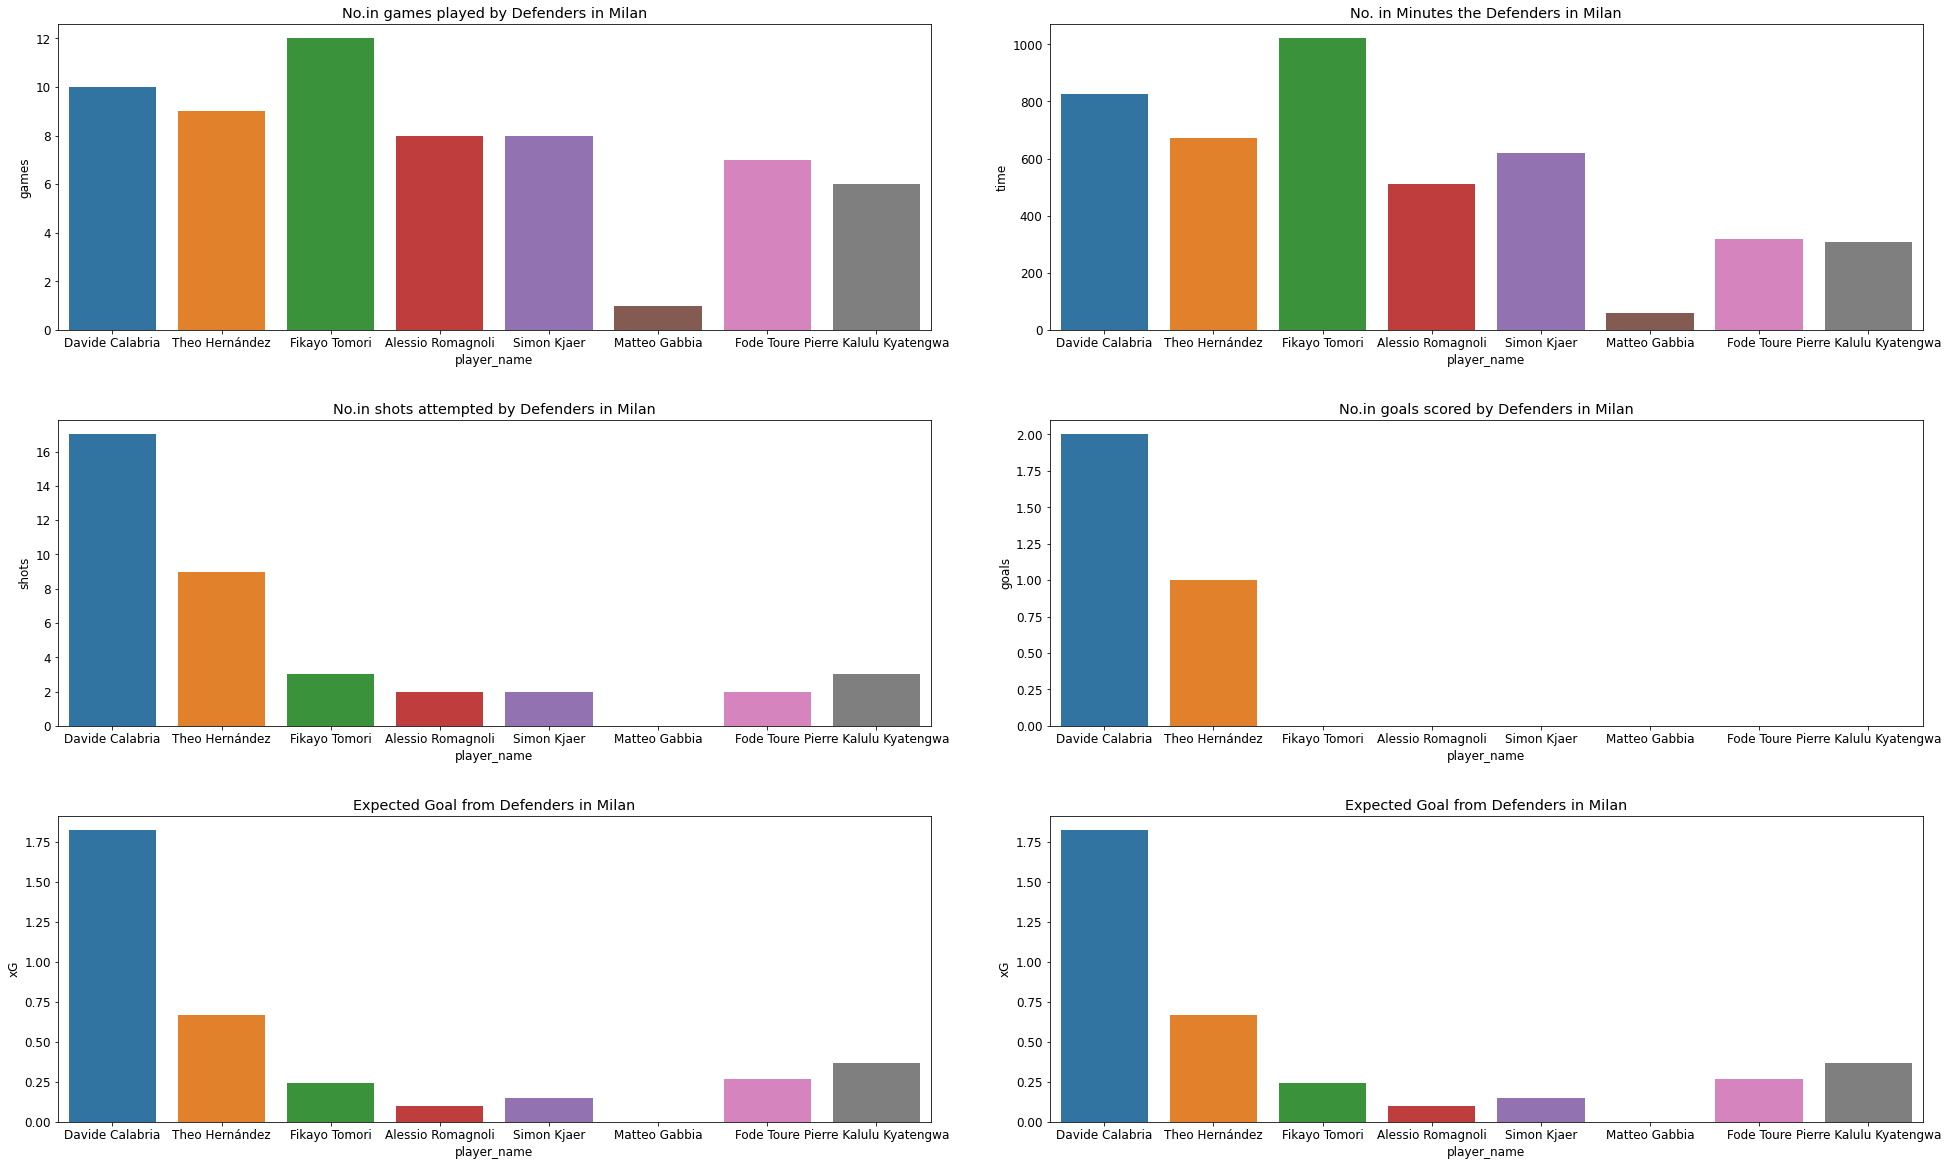

In [28]:
plt.figure(figsize=(28,17))
plt.rcParams.update({'font.size':12})
plt.subplot(3,2, 1)
sns.barplot(x='player_name',y='games',data=Defenders)
plt.title('No.in games played by Defenders in Milan')

plt.subplot(3, 2, 2)
sns.barplot(x='player_name',y='time',data=Defenders)
plt.title('No. in Minutes the Defenders in Milan')


plt.subplot(3, 2, 3)
sns.barplot(x='player_name',y='shots',data=Defenders,)
plt.title('No.in shots attempted by Defenders in Milan')

plt.subplot(3, 2, 4)
sns.barplot(x='player_name',y='goals',data=Defenders)
plt.title('No.in goals scored by Defenders in Milan')

plt.subplot(3, 2, 5)
sns.barplot(x='player_name',y='xG',data=Defenders)
plt.title('Expected Goal from Defenders in Milan')

plt.subplot(3, 2, 6)
sns.barplot(x='player_name',y='xG',data=Defenders)
plt.title('Expected Goal from Defenders in Milan')


plt.tight_layout(3)

plt.savefig('Defenders in milan.png')

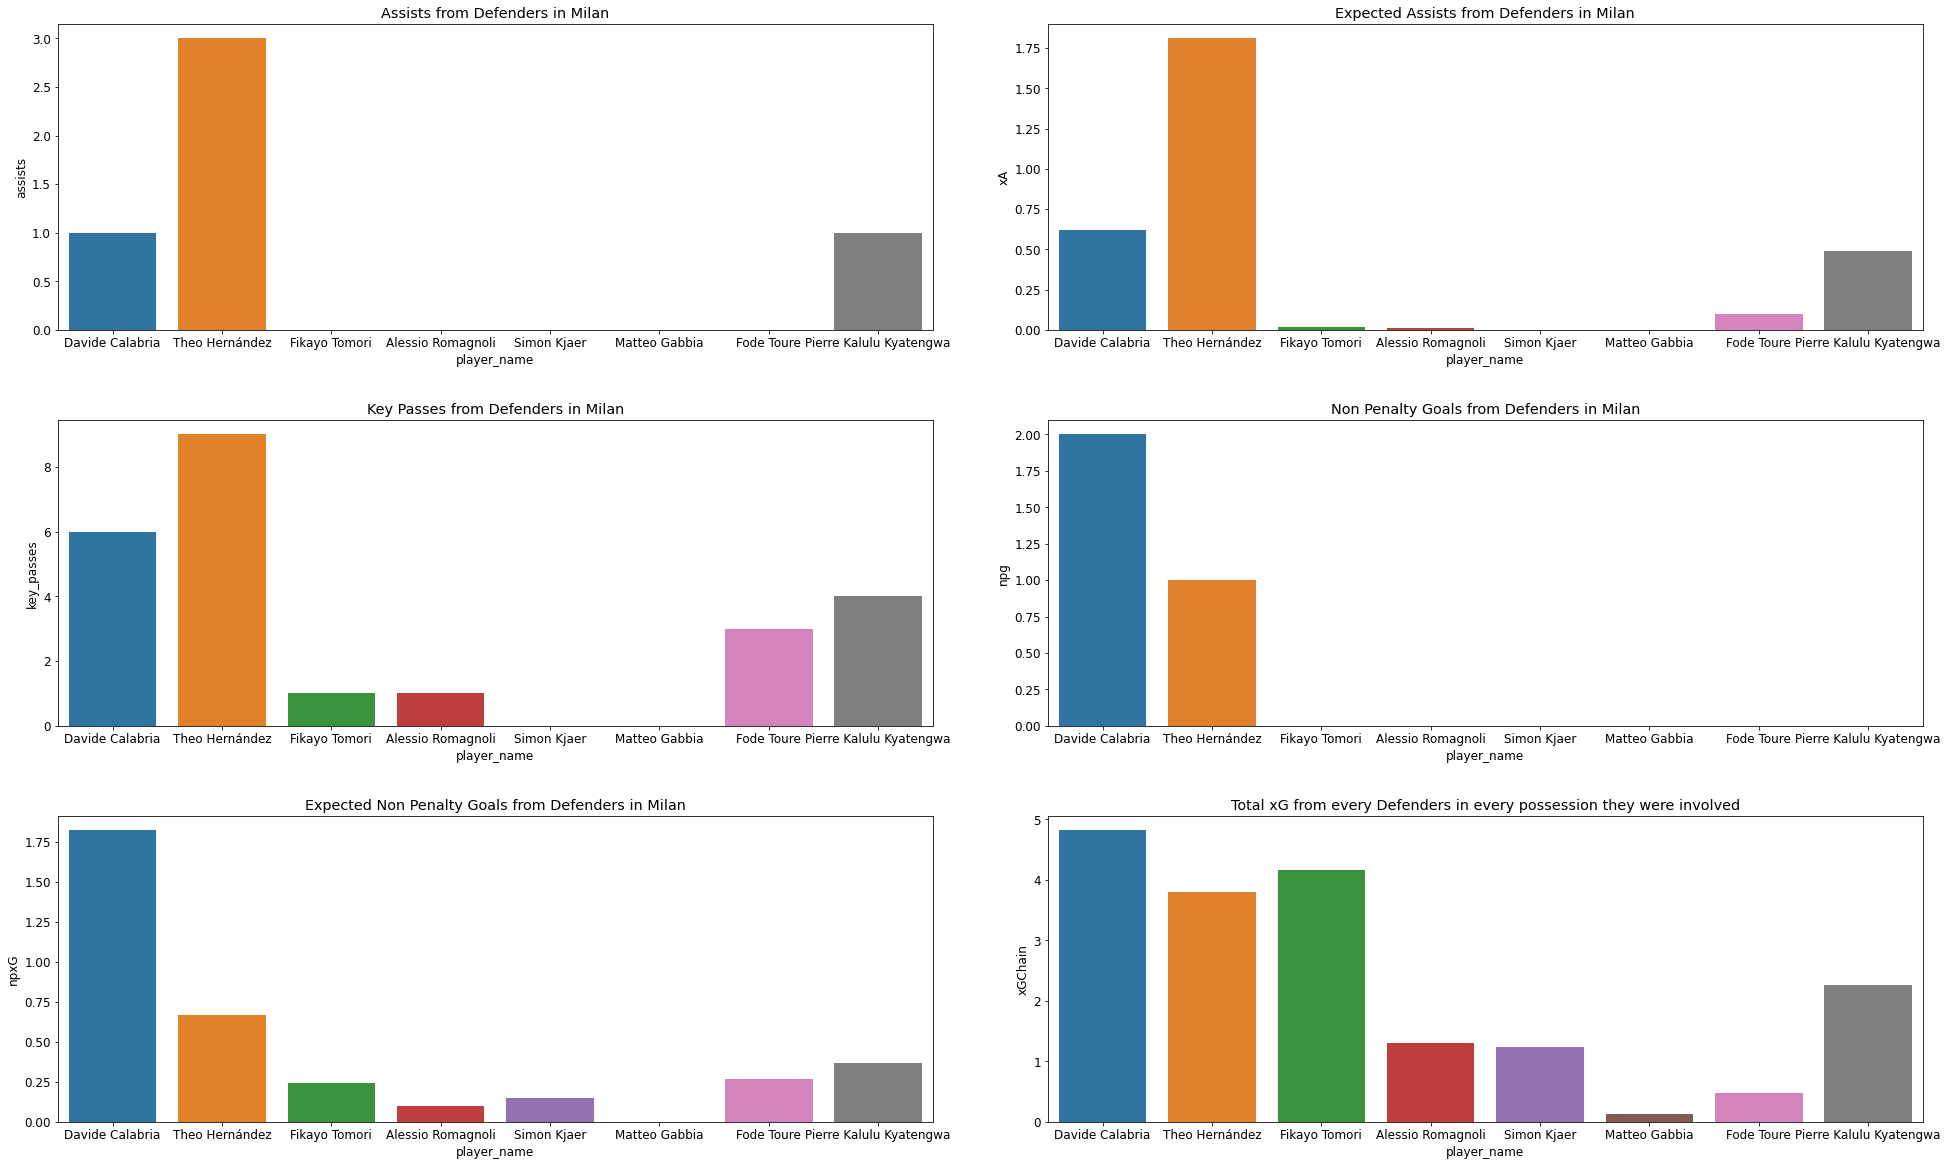

In [29]:
plt.figure(figsize=(28,17))
plt.rcParams.update({'font.size':12})

plt.subplot(3, 2, 1)
sns.barplot(x='player_name',y='assists',data=Defenders)
plt.title('Assists from Defenders in Milan')

plt.subplot(3, 2, 2)
sns.barplot(x='player_name',y='xA',data=Defenders)
plt.title('Expected Assists from Defenders in Milan')

plt.subplot(3, 2, 3)
sns.barplot(x='player_name',y='key_passes',data=Defenders)
plt.title('Key Passes from Defenders in Milan')

plt.subplot(3, 2, 4)
sns.barplot(x='player_name',y='npg',data=Defenders)
plt.title('Non Penalty Goals from Defenders in Milan')

plt.subplot(3,2,5)
sns.barplot(x='player_name',y='npxG',data=Defenders)
plt.title('Expected Non Penalty Goals from Defenders in Milan')

plt.subplot(3, 2, 6)
sns.barplot(x='player_name',y='xGChain',data=Defenders)
plt.title('Total xG from every Defenders in every possession they were involved')

plt.tight_layout(3)
plt.savefig('Defenders2.png')

In [30]:
attack = ['S','F S','F M S']
Attackers = final_json.loc[final_json['position'].isin(attack)]
Attackers.sort_values(by='goals',ascending=False)

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,502,Olivier Giroud,7,457,4,2.63,0,1.07,8,8,1,0,F S,AC Milan,3,1.87,2.09,0.26
2,1741,Zlatan Ibrahimovic,6,276,3,2.02,1,0.23,12,5,1,0,F S,AC Milan,3,2.02,2.67,0.79
7,1852,Ante Rebic,9,496,1,1.69,2,3.04,17,16,0,0,F M S,AC Milan,1,1.69,4.14,0.77
17,3429,Tiemoué Bakayoko,5,97,0,0.02,0,0.02,1,1,2,0,S,AC Milan,0,0.02,1.19,1.15
21,4932,Pietro Pellegri,3,61,0,0.11,0,0.15,2,2,0,0,S,AC Milan,0,0.11,0.27,0.02
25,8838,Junior Messias,1,15,0,0.00,0,0.00,0,0,1,0,S,AC Milan,0,0.00,0.12,0.12


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

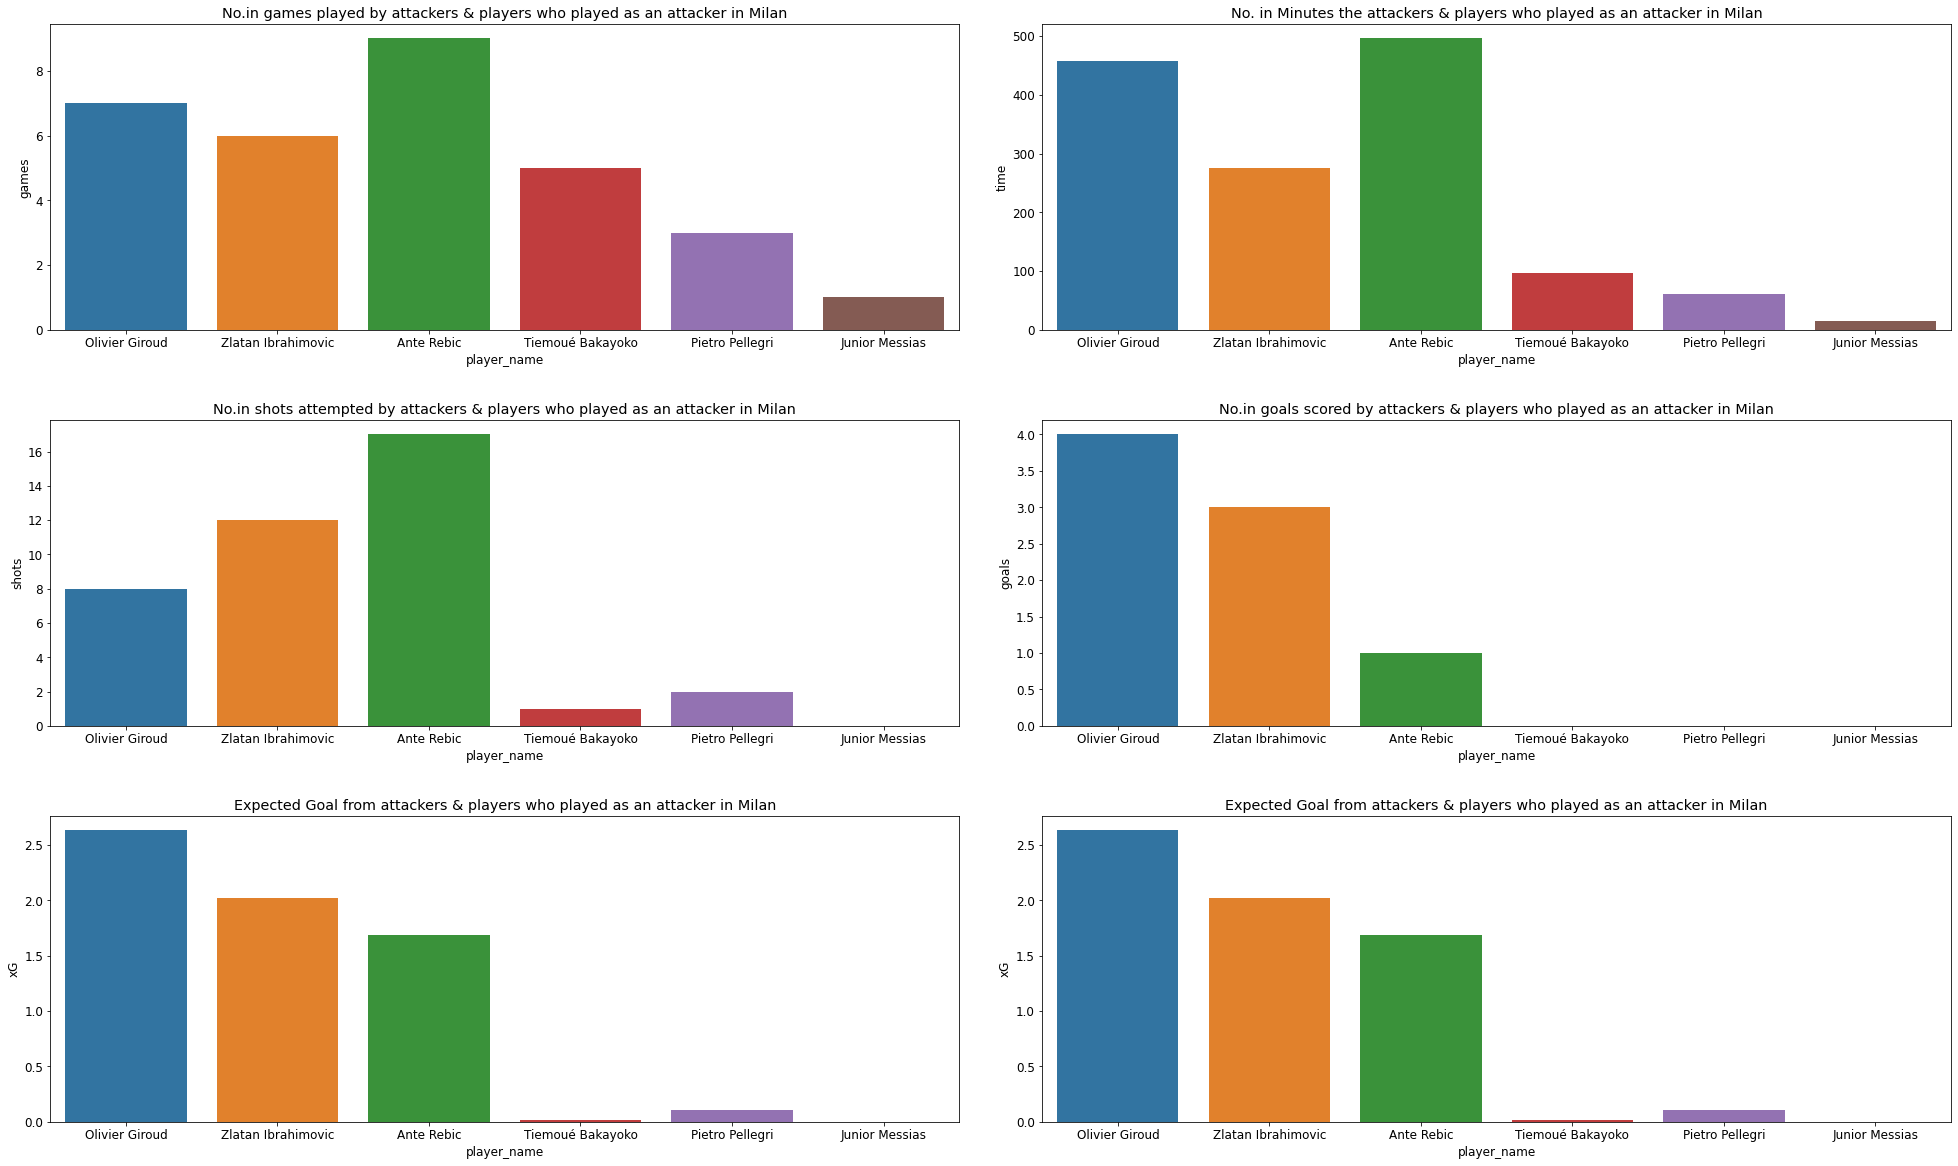

In [32]:
plt.figure(figsize=(28,17))
plt.rcParams.update({'font.size':12})


plt.subplot(3,2, 1)
sns.barplot(x='player_name',y='games',data=Attackers)
plt.title('No.in games played by attackers & players who played as an attacker in Milan')

plt.subplot(3, 2, 2)
sns.barplot(x='player_name',y='time',data=Attackers)
plt.title('No. in Minutes the attackers & players who played as an attacker in Milan')


plt.subplot(3, 2, 3)
sns.barplot(x='player_name',y='shots',data=Attackers,)
plt.title('No.in shots attempted by attackers & players who played as an attacker in Milan')

plt.subplot(3, 2, 4)
sns.barplot(x='player_name',y='goals',data=Attackers)
plt.title('No.in goals scored by attackers & players who played as an attacker in Milan')

plt.subplot(3, 2, 5)
sns.barplot(x='player_name',y='xG',data=Attackers)
plt.title('Expected Goal from attackers & players who played as an attacker in Milan')

plt.subplot(3, 2, 6)
sns.barplot(x='player_name',y='xG',data=Attackers)
plt.title('Expected Goal from attackers & players who played as an attacker in Milan')

plt.tight_layout(3)

plt.savefig('Attackers in milan.png')

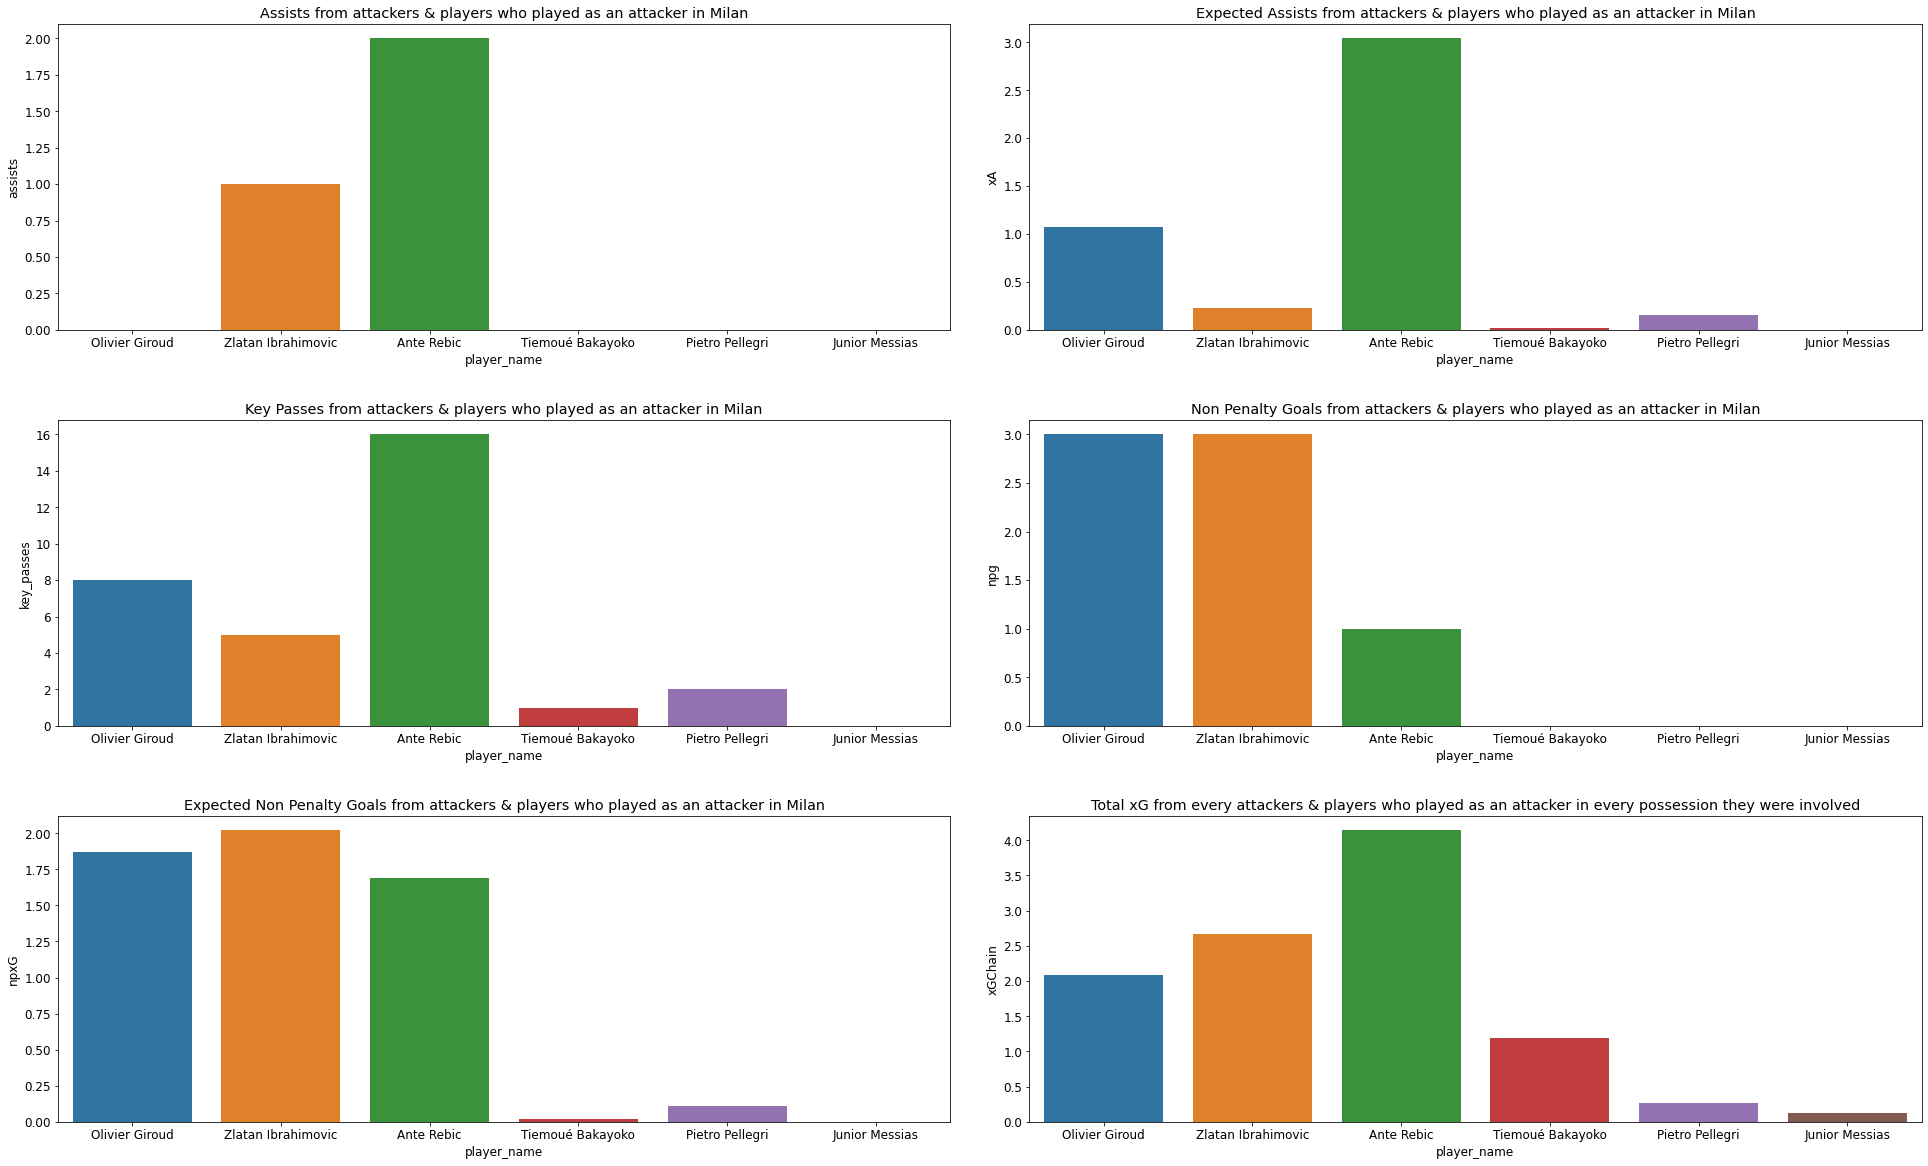

In [33]:
plt.figure(figsize=(28,17))
plt.rcParams.update({'font.size':12})

plt.subplot(3, 2, 1)
sns.barplot(x='player_name',y='assists',data=Attackers)
plt.title('Assists from attackers & players who played as an attacker in Milan')

plt.subplot(3,2,2)
sns.barplot(x='player_name',y='xA',data=Attackers)
plt.title('Expected Assists from attackers & players who played as an attacker in Milan')

plt.subplot(3,2,3)
sns.barplot(x='player_name',y='key_passes',data=Attackers)
plt.title('Key Passes from attackers & players who played as an attacker in Milan')

plt.subplot(3,2,4)
sns.barplot(x='player_name',y='npg',data=Attackers)
plt.title('Non Penalty Goals from attackers & players who played as an attacker in Milan')

plt.subplot(3,2,5)
sns.barplot(x='player_name',y='npxG',data=Attackers)
plt.title('Expected Non Penalty Goals from attackers & players who played as an attacker in Milan')

plt.subplot(3,2,6)
sns.barplot(x='player_name',y='xGChain',data=Attackers)
plt.title('Total xG from every attackers & players who played as an attacker in every possession they were involved')



plt.tight_layout(3)
plt.savefig('Attackers2 in milan.png')


In [34]:
Midfielders = final_json[final_json['position']=='M S']
Midfielders.sort_values(by='goals',ascending=False)

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
1,7193,Rafael Leão,12,891,4,2.95,1,0.68,31,8,1,0,M S,AC Milan,4,2.95,4.83,1.48
3,6421,Brahim Diaz,8,556,3,1.92,1,0.66,12,8,2,0,M S,AC Milan,3,1.92,4.51,1.94
4,1489,Franck Kessié,9,674,2,3.35,0,0.43,9,9,1,0,M S,AC Milan,0,1.07,3.62,2.53
6,7958,Sandro Tonali,12,804,2,0.82,1,1.32,14,10,2,0,M S,AC Milan,2,0.82,4.18,3.13
9,6981,Ismael Bennacer,12,493,1,0.27,1,0.57,6,10,0,0,M S,AC Milan,1,0.27,2.84,2.59
10,8163,Daniel Maldini,4,112,1,0.44,0,0.05,2,1,1,0,M S,AC Milan,1,0.44,0.60,0.11
13,1254,Alessandro Florenzi,5,180,0,0.21,0,0.03,5,1,0,0,M S,AC Milan,0,0.21,0.38,0.19
14,1311,Rade Krunic,7,513,0,0.31,1,1.47,3,7,0,0,M S,AC Milan,0,0.31,1.38,0.82
16,2303,Samu Castillejo,3,91,0,0.09,0,0.05,1,1,0,0,M S,AC Milan,0,0.09,0.39,0.25
23,8297,Alexis Saelemaekers,12,729,0,1.05,2,1.75,14,12,1,0,M S,AC Milan,0,1.05,7.10,4.83


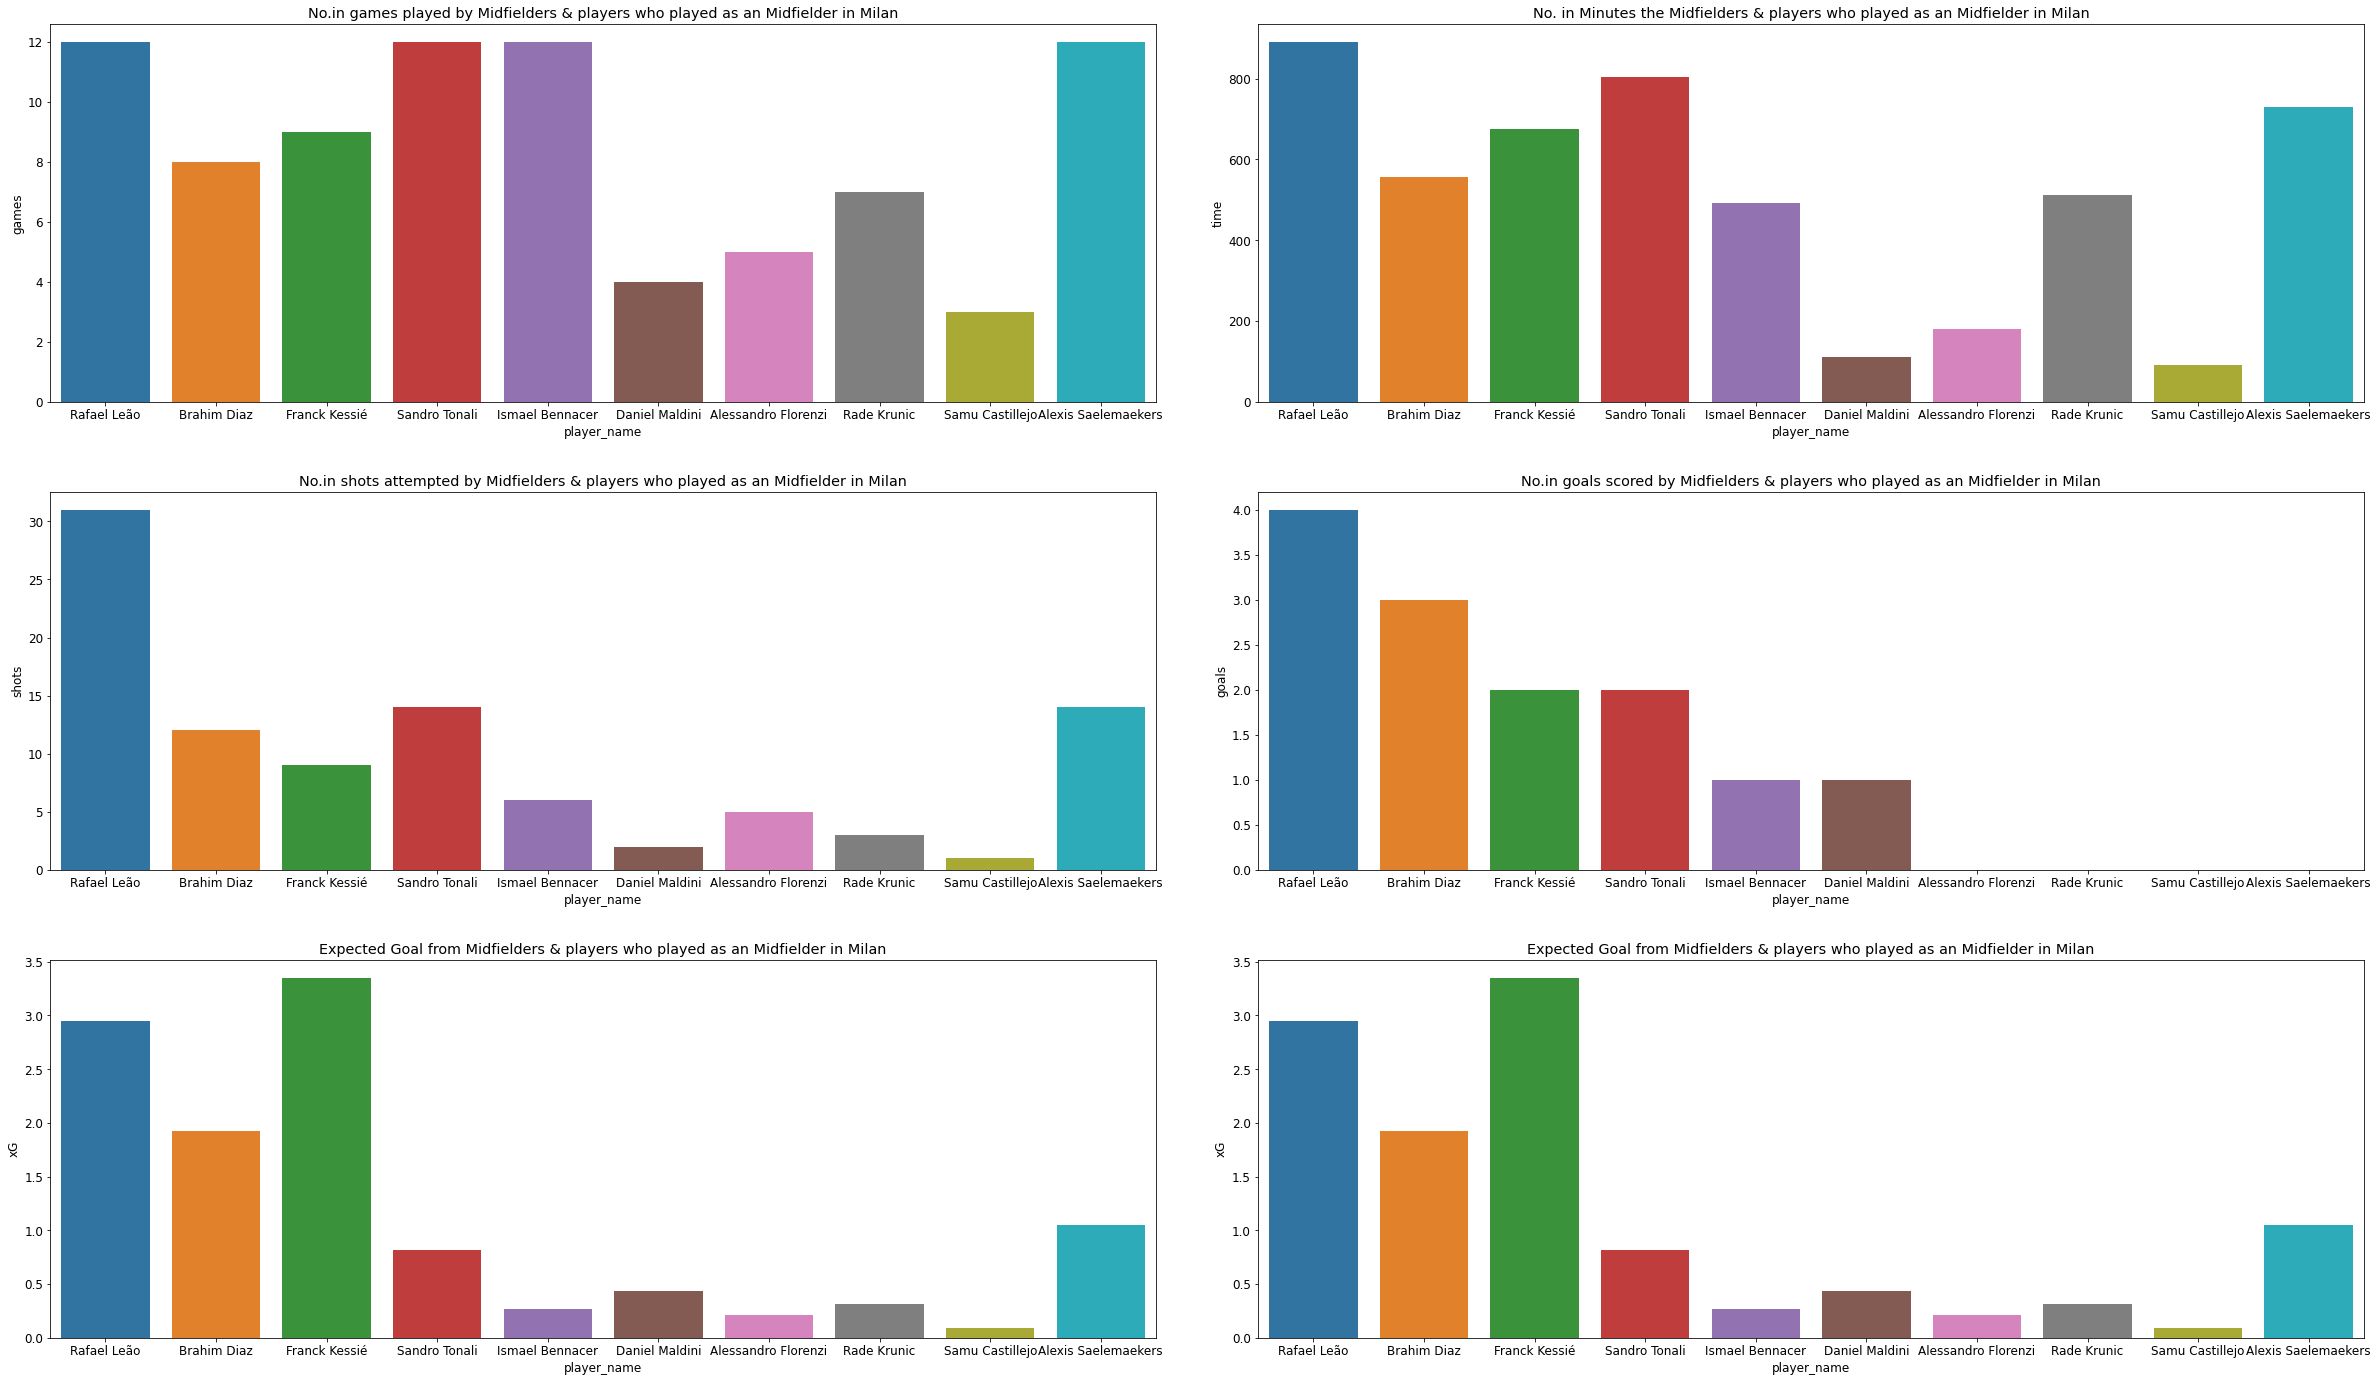

In [35]:
plt.figure(figsize=(34,20))
plt.rcParams.update({'font.size':12})

plt.subplot(3,2,1)
sns.barplot(x='player_name',y='games',data=Midfielders)
plt.title('No.in games played by Midfielders & players who played as an Midfielder in Milan')

plt.subplot(3,2,2)
sns.barplot(x='player_name',y='time',data=Midfielders)
plt.title('No. in Minutes the Midfielders & players who played as an Midfielder in Milan')


plt.subplot(3,2,3)
sns.barplot(x='player_name',y='shots',data=Midfielders,)
plt.title('No.in shots attempted by Midfielders & players who played as an Midfielder in Milan')

plt.subplot(3,2,4)
sns.barplot(x='player_name',y='goals',data=Midfielders)
plt.title('No.in goals scored by Midfielders & players who played as an Midfielder in Milan')

plt.subplot(3,2,5)
sns.barplot(x='player_name',y='xG',data=Midfielders)
plt.title('Expected Goal from Midfielders & players who played as an Midfielder in Milan')

plt.subplot(3,2,6)
sns.barplot(x='player_name',y='xG',data=Midfielders)
plt.title('Expected Goal from Midfielders & players who played as an Midfielder in Milan')

plt.tight_layout(3)
plt.savefig('Midfielders in milan.png')

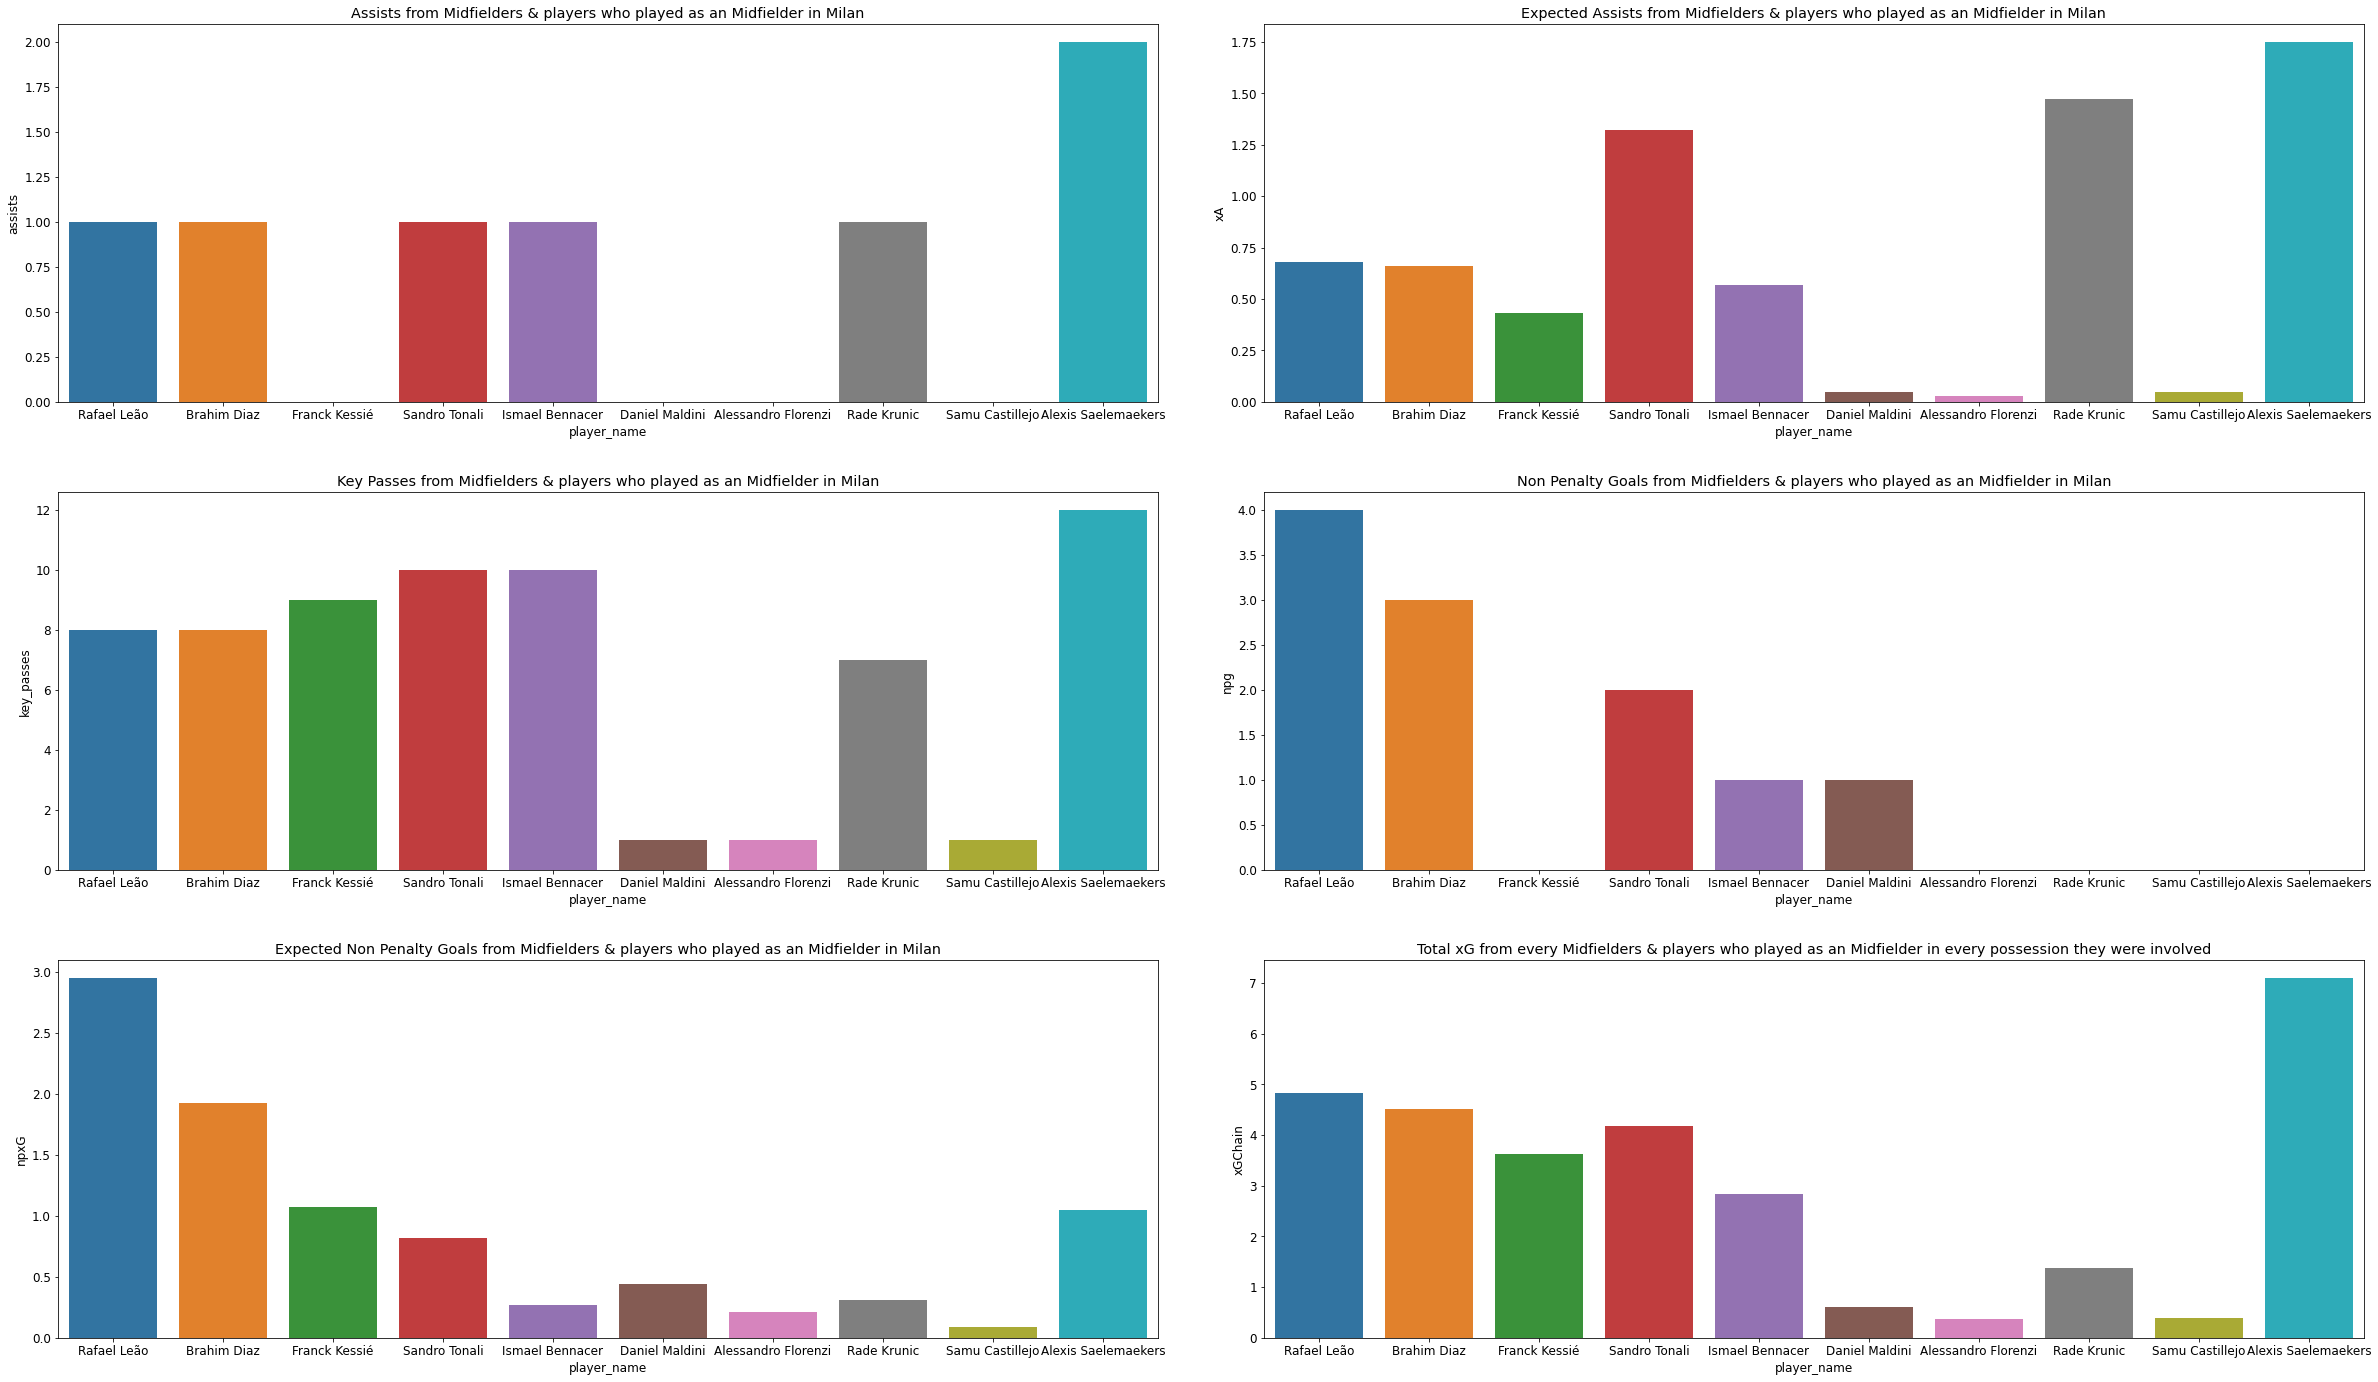

In [36]:
plt.figure(figsize=(34,20))
plt.rcParams.update({'font.size':12})

plt.subplot(3,2,1)
sns.barplot(x='player_name',y='assists',data=Midfielders)
plt.title('Assists from Midfielders & players who played as an Midfielder in Milan')

plt.subplot(3,2,2)
sns.barplot(x='player_name',y='xA',data=Midfielders)
plt.title('Expected Assists from Midfielders & players who played as an Midfielder in Milan')

plt.subplot(3,2,3)
sns.barplot(x='player_name',y='key_passes',data=Midfielders)
plt.title('Key Passes from Midfielders & players who played as an Midfielder in Milan')

plt.subplot(3,2,4)
sns.barplot(x='player_name',y='npg',data=Midfielders)
plt.title('Non Penalty Goals from Midfielders & players who played as an Midfielder in Milan')

plt.subplot(3,2,5)
sns.barplot(x='player_name',y='npxG',data=Midfielders)
plt.title('Expected Non Penalty Goals from Midfielders & players who played as an Midfielder in Milan')

plt.subplot(3,2,6)
sns.barplot(x='player_name',y='xGChain',data=Midfielders)
plt.title('Total xG from every Midfielders & players who played as an Midfielder in every possession they were involved')



plt.tight_layout(3)
plt.savefig('Midfielders2 in milan.png')